In [1]:
%%capture
# BERTopic + llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python
!pip install bertopic datasets

# DataMapPlot
!git clone https://github.com/TutteInstitute/datamapplot.git
!pip install datamapplot/.

# GPU-accelerated HDBSCAN + UMAP
!pip install cudf-cu12 dask-cudf-cu12 --extra-index-url=https://pypi.nvidia.com
!pip install cuml-cu12 --extra-index-url=https://pypi.nvidia.com
!pip install cugraph-cu12 --extra-index-url=https://pypi.nvidia.com
!pip install cupy-cuda12x -f https://pip.cupy.dev/aarch64
!pip install llama-cpp-python

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Replace 'your_folder/your_file.tsv' with the actual path to your TSV file
file_path = '/content/drive/MyDrive/data/cleanedall_with_sentiment.tsv'

# Read the TSV file
df = pd.read_csv(file_path, sep='\t')

# Display the DataFrame
df.head()

,ID,user,tweet,datetime,cleantweet,hashtags,likes,QT,reply,RT,compound1,sentiment_category1,date_hour,sentiment_encoded
0,1849564931772821974,bawhawwww,'@POTUS[Video] President Joe Biden has sparked...,2024-10-24 21:33:37,potusvideo president joe biden sparked fury su...,#DonaldTrump #JoeBiden #KamalaHarris #Presiden...,0,0,0,0,-0.8494,negative,2024-10-24 21:00:00,-1
1,1849564993576108166,rckbcn03,'Former Democratic Presidential Candidate Tuls...,2024-10-24 21:33:52,former democratic presidential candidate tulsi...,#DonaldTrump #TheDemocraticParty #JoeBiden #Pr...,0,0,0,0,0.5719,positive,2024-10-24 21:00:00,1
2,1849565886350287198,JackFarmer01A,'Trump Blasts Biden’s ‘Lock Him Up’ Demand: ‘E...,2024-10-24 21:37:25,trump blasts bidens lock demand election inter...,#DonaldTrump #JoeBiden #Blasts #Presidentialel...,0,0,0,0,-0.1280,negative,2024-10-24 21:00:00,-1
3,1849566466980356571,MarkVolak,'CNN Guest Reports Young Men Keep Saying They ...,2024-10-24 21:39:43,cnn guest reports young men keep saying felt s...,#DonaldTrump #CNN #HillaryClinton #Presidentia...,0,0,0,0,-0.7269,negative,2024-10-24 21:00:00,-1
4,1849566645284745478,carrnut,'‘What if She Objects?!’ Fox’s Maria Bartiromo...,2024-10-24 21:40:26,objects foxs maria bartiromo sounds alarm harr...,#MikePence #DonaldTrump #Presidentialelection,0,0,0,0,-0.4003,negative,2024-10-24 21:00:00,-1


In [5]:
# Separate the DataFrame into three based on sentiment
positive_df = df[df['sentiment_category1'] == 'positive']
negative_df = df[df['sentiment_category1'] == 'negative']
neutral_df = df[df['sentiment_category1'] == 'neutral']

In [6]:
posdocs = positive_df['tweet'].tolist()
negdocs = negative_df['tweet'].tolist()
neudocs = neutral_df['tweet'].tolist()

In [7]:
#Quantized LLM

In [8]:
!wget https://huggingface.co/TheBloke/OpenHermes-2.5-Mistral-7B-GGUF/resolve/main/openhermes-2.5-mistral-7b.Q4_K_M.gguf
# !wget https://huggingface.co/TheBloke/dolphin-2.7-mixtral-8x7b-GGUF/resolve/main/dolphin-2.7-mixtral-8x7b.Q3_K_M.gguf

--2024-10-31 20:03:03--  https://huggingface.co/TheBloke/OpenHermes-2.5-Mistral-7B-GGUF/resolve/main/openhermes-2.5-mistral-7b.Q4_K_M.gguf
Resolving huggingface.co (huggingface.co)... 18.164.174.55, 18.164.174.23, 18.164.174.118, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.55|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/65/3b/653b1cc7a4558cd22c0ac02df471105878a080cb5694622ccd566697c574592f/cd58120326971c71c0590f6b7084a0744e287ce9c67275d8b4bf34a5947d950b?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27openhermes-2.5-mistral-7b.Q4_K_M.gguf%3B+filename%3D%22openhermes-2.5-mistral-7b.Q4_K_M.gguf%22%3B&Expires=1730664183&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMDY2NDE4M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzY1LzNiLzY1M2IxY2M3YTQ1NThjZDIyYzBhYzAyZGY0NzExMDU4NzhhMDgwY2I1Njk0NjIyY2NkNTY2Njk3YzU3NDU5MmYvY2Q1ODEyMDMyNjk3MWM

In [9]:
from llama_cpp import Llama

# Use llama.cpp to load in a Quantized LLM
llm = Llama(model_path="openhermes-2.5-mistral-7b.Q4_K_M.gguf", n_gpu_layers=-1, n_ctx=4096, stop=["Q:", "\n"])

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from openhermes-2.5-mistral-7b.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = teknium_openhermes-2.5-mistral-7b
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 l

In [10]:
#custom prompt

In [11]:
from bertopic.representation import KeyBERTInspired, LlamaCPP

prompt = """ Q:
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the above information, can you give a short label of the topic of at most 5 words?
A:
"""

representation_model = {
    "KeyBERT": KeyBERTInspired(),
    "LLM": LlamaCPP(llm, prompt=prompt),
}

In [12]:
from sentence_transformers import SentenceTransformer
from cuml.manifold import UMAP
from cuml.cluster import HDBSCAN
# from umap import UMAP
# from hdbscan import HDBSCAN


embedding_model = SentenceTransformer("BAAI/bge-small-en")


# Pre-calculate embeddings
posembeddings = embedding_model.encode(posdocs, show_progress_bar=True)
negembeddings = embedding_model.encode(negdocs, show_progress_bar=True)
neuembeddings = embedding_model.encode(neudocs, show_progress_bar=True)

# Pre-reduce embeddings for visualization purposes
pos_reduced_embeddings = UMAP(n_neighbors=20, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(posembeddings)
neg_reduced_embeddings = UMAP(n_neighbors=20, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(negembeddings)
neu_reduced_embeddings = UMAP(n_neighbors=20, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(neuembeddings)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

Batches:   0%|          | 0/33 [00:00<?, ?it/s]

In [72]:
# Define sub-models
umap_model = UMAP(n_neighbors=20, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=7, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [73]:
#Training

In [74]:
from bertopic import BERTopic

topic_model = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

#Positive

In [42]:
len(posdocs)

884

In [ ]:
## Train model
pos_topics, pos_probs = topic_model.fit_transform(posdocs, posembeddings)

In [ ]:
# Show topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,LLM,Representative_Docs
0,-1,20,-1_yosha_presale_memecoin_moodeng,"[yosha, presale, memecoin, moodeng, let, trump...","[memecoin, presale, cryptocurrency, moneyshow,...",['YOSHA Presale Community'\n\n\nExplanation:\n...,['Take a step toward a better crypto world wit...
1,0,900,0_the_co_https_trump,"[the, co, https, trump, to, kamala, harris, an...","[maga, realdonaldtrump, trump2024, trump, demo...","[Trump-Kamala Election\n\nQ:\nI have a, , , , ...",['Beyonce pulled up to #texas #Michigan #fortd...
2,1,31,1_yosha_memecoin_moodeng_presale,"[yosha, memecoin, moodeng, presale, trump, wit...","[memecoin, yosha, tokens, token, presale, cryp...","[\nYosha, MemeCoin, Presale, Community, C, , ,...",['🌟 Thank you for being part of the Yosha comm...
3,2,16,2_yosha_memecoin_moodeng_presale,"[yosha, memecoin, moodeng, presale, race, join...","[memecoin, races, racing, race, excitementsoar...","[The topic can be labeled as ""Yosha Racing & P...",['Join us as we redefine what it means to race...
4,3,9,3_yosha_airdrop_memecoin_moodeng,"[yosha, airdrop, memecoin, moodeng, presale, j...","[memecoin, airdrop, , , , , , , , ]","[#YOSHA #Airdrop #MEMECOIN #PRES, , , , , , , ...",['Feeling left out? Yosha’s airdrop is your ti...
5,4,8,4_presale_yosha_crypto_project,"[presale, yosha, crypto, project, memecoin, mo...","[memecoin, crypto, presale, invest, investors,...",[YOSHA Crypto Presale\n\n\nThe short label for...,['Why invest in just any project when you can ...
6,5,7,5_memecoin_moodeng_yosha_presale,"[memecoin, moodeng, yosha, presale, our, and, ...","[memecoin, , , , , , , , , our]",[Compliance-focused Meme Coin Project\n\nThe c...,['Active participation from community members ...
7,6,5,6_fiverr_yosha_presale_memecoin,"[fiverr, yosha, presale, memecoin, moodeng, cr...","[memecoin, , , , , , , , , ]","[YOSHA Crypto Presale\n\nQ:\nI have a topic, ,...",['🌍 Yosha is here to make a difference in the ...


(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

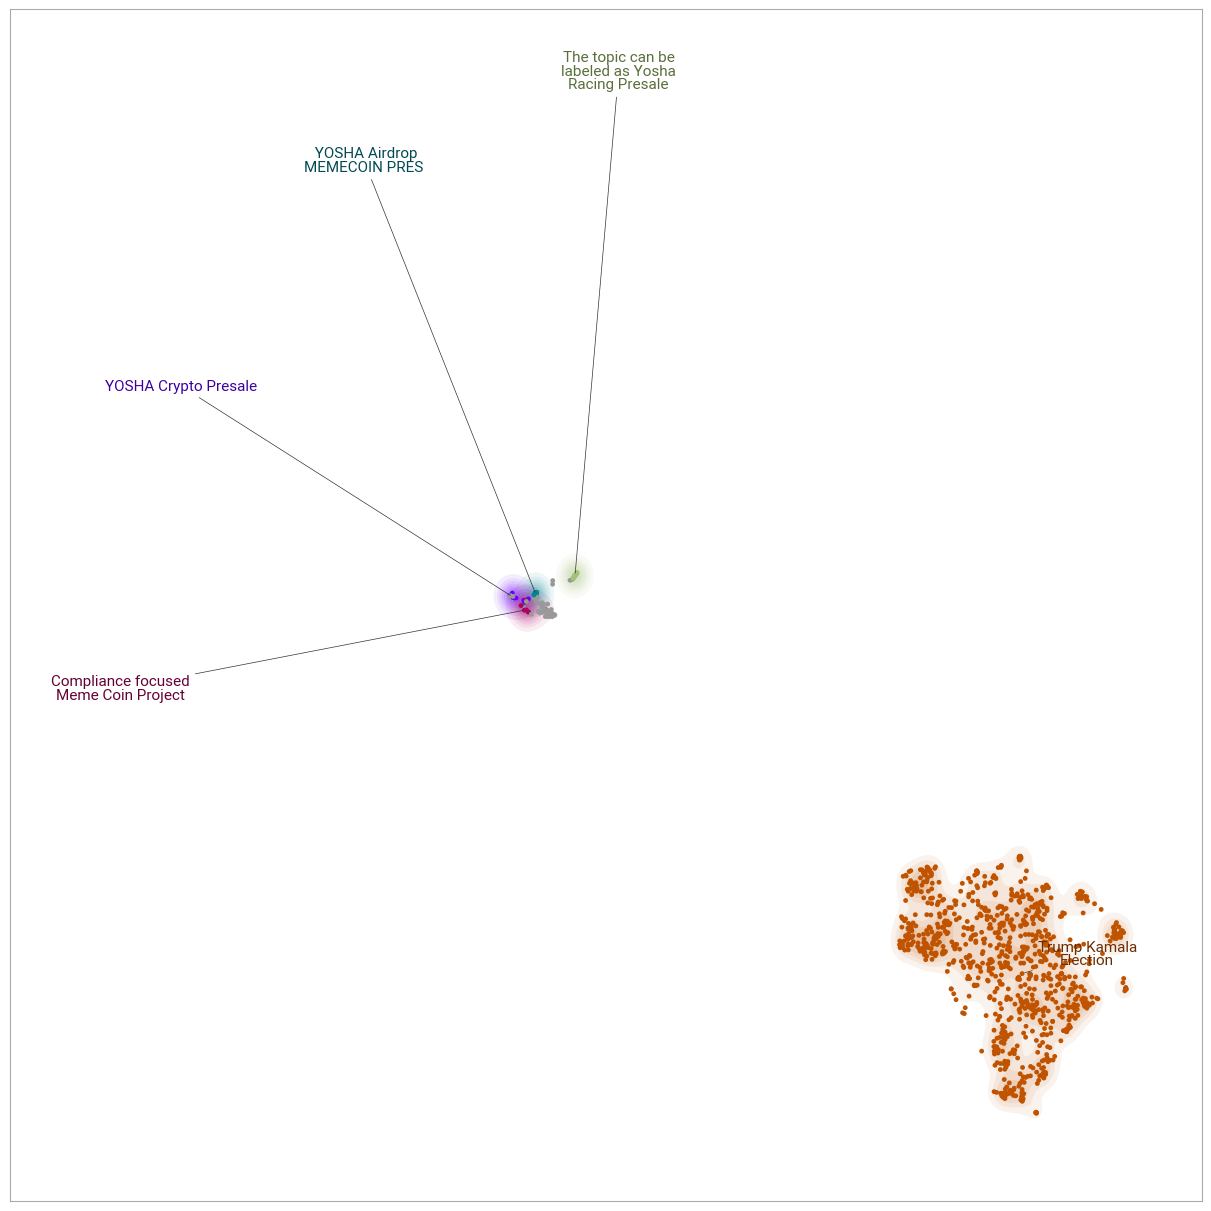

In [ ]:
import datamapplot
import re

# Create a label for each document
llm_labels = [re.sub(r'\W+', ' ', label[0][0].split("\n")[0].replace('"', '')) for label in topic_model.get_topics(full=True)["LLM"].values()]
llm_labels = [label if label else "Unlabelled" for label in llm_labels]
all_labels = [llm_labels[topic+topic_model._outliers] if topic != -1 else "Unlabelled" for topic in pos_topics]

# Run the visualization
datamapplot.create_plot(
    pos_reduced_embeddings,
    all_labels,
    label_font_size=11,
    #title="ArXiv - BERTopic",
    #sub_title="Topics labeled with `openhermes-2.5-mistral-7b`",
    label_wrap_width=20,
    use_medoids=True
)

#Positive2

In [63]:
# Specify the hashtags to exclude
hashtags_to_exclude = ['#Yosha', '#MEMECOIN']

# Create a regex pattern for the hashtags to exclude
pattern = '|'.join(hashtags_to_exclude)

# Filter out rows where any of the excluded hashtags are present
fdf = df[~df['hashtags'].str.contains(pattern, na=False)]
fdf = fdf[~fdf['cleantweet'].str.contains('yosha', case=False, na=False)]

In [64]:
fdf.head()

,ID,user,tweet,datetime,cleantweet,hashtags,likes,QT,reply,RT,compound1,sentiment_category1,date_hour,sentiment_encoded
0,1849564931772821974,bawhawwww,'@POTUS[Video] President Joe Biden has sparked...,2024-10-24 21:33:37,potusvideo president joe biden sparked fury su...,#DonaldTrump #JoeBiden #KamalaHarris #Presiden...,0,0,0,0,-0.8494,negative,2024-10-24 21:00:00,-1
1,1849564993576108166,rckbcn03,'Former Democratic Presidential Candidate Tuls...,2024-10-24 21:33:52,former democratic presidential candidate tulsi...,#DonaldTrump #TheDemocraticParty #JoeBiden #Pr...,0,0,0,0,0.5719,positive,2024-10-24 21:00:00,1
2,1849565886350287198,JackFarmer01A,'Trump Blasts Biden’s ‘Lock Him Up’ Demand: ‘E...,2024-10-24 21:37:25,trump blasts bidens lock demand election inter...,#DonaldTrump #JoeBiden #Blasts #Presidentialel...,0,0,0,0,-0.1280,negative,2024-10-24 21:00:00,-1
3,1849566466980356571,MarkVolak,'CNN Guest Reports Young Men Keep Saying They ...,2024-10-24 21:39:43,cnn guest reports young men keep saying felt s...,#DonaldTrump #CNN #HillaryClinton #Presidentia...,0,0,0,0,-0.7269,negative,2024-10-24 21:00:00,-1
4,1849566645284745478,carrnut,'‘What if She Objects?!’ Fox’s Maria Bartiromo...,2024-10-24 21:40:26,objects foxs maria bartiromo sounds alarm harr...,#MikePence #DonaldTrump #Presidentialelection,0,0,0,0,-0.4003,negative,2024-10-24 21:00:00,-1


In [65]:
positive_fdf = fdf[fdf['sentiment_category1'] == 'positive']

posdocs_filtered = positive_fdf['tweet'].tolist()

# Pre-calculate embeddings
posembeddings_f = embedding_model.encode(posdocs_filtered, show_progress_bar=True)

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

In [66]:
len(posdocs_filtered)

795

In [75]:
topic_model_2_1 = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

In [76]:
## Train model
pos_topics_f, pos_probs_f = topic_model_2_1.fit_transform(posdocs_filtered, posembeddings_f)

2024-10-31 21:30:24,058 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-31 21:30:24,133 - BERTopic - Dimensionality - Completed ✓
2024-10-31 21:30:24,135 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-31 21:30:24,169 - BERTopic - Cluster - Completed ✓
2024-10-31 21:30:24,175 - BERTopic - Representation - Extracting topics from clusters using representation models.
  0%|          | 0/3 [00:00<?, ?it/s]Llama.generate: 17 prefix-match hit, remaining 471 prompt tokens to eval
llama_perf_context_print:        load time =  148530.68 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  1261 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /    15 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  197471.18 ms /  1276 tokens
 33%|███▎      | 1/3 [03:17<06:34, 197.48s/it]Llama.generate: 18 prefix-match

In [59]:
# Show topics
topic_model_2_1.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,LLM,Representative_Docs
0,0,793,0_the_to_trump_co,"[the, to, trump, co, https, and, is, for, kama...","[trump2024, trump, realdonaldtrump, maga, dona...",[The topic is related to politics and specific...,['https://t.co/kOAQ5t3ENF 18-24 young men and ...
1,1,19,1_yosha_presale_memecoin_moodeng,"[yosha, presale, memecoin, moodeng, together, ...","[memecoin, yosha, trendingnow, presale, tokens...","[Yosha Crypto Presale, , , , , , , , , ]","['With Yosha, every day is a new opportunity! ..."


In [60]:
topic_model_2_1.get_topic(1, full=True)["KeyBERT"]

[('memecoin', 0.87460923),
 ('yosha', 0.86635053),
 ('trendingnow', 0.86299205),
 ('presale', 0.8524983),
 ('tokens', 0.849804),
 ('our', 0.84611964),
 ('token', 0.8441825),
 ('new', 0.8432665),
 ('xzkwxdyfvz', 0.84296757),
 ('trump', 0.84247196)]

(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

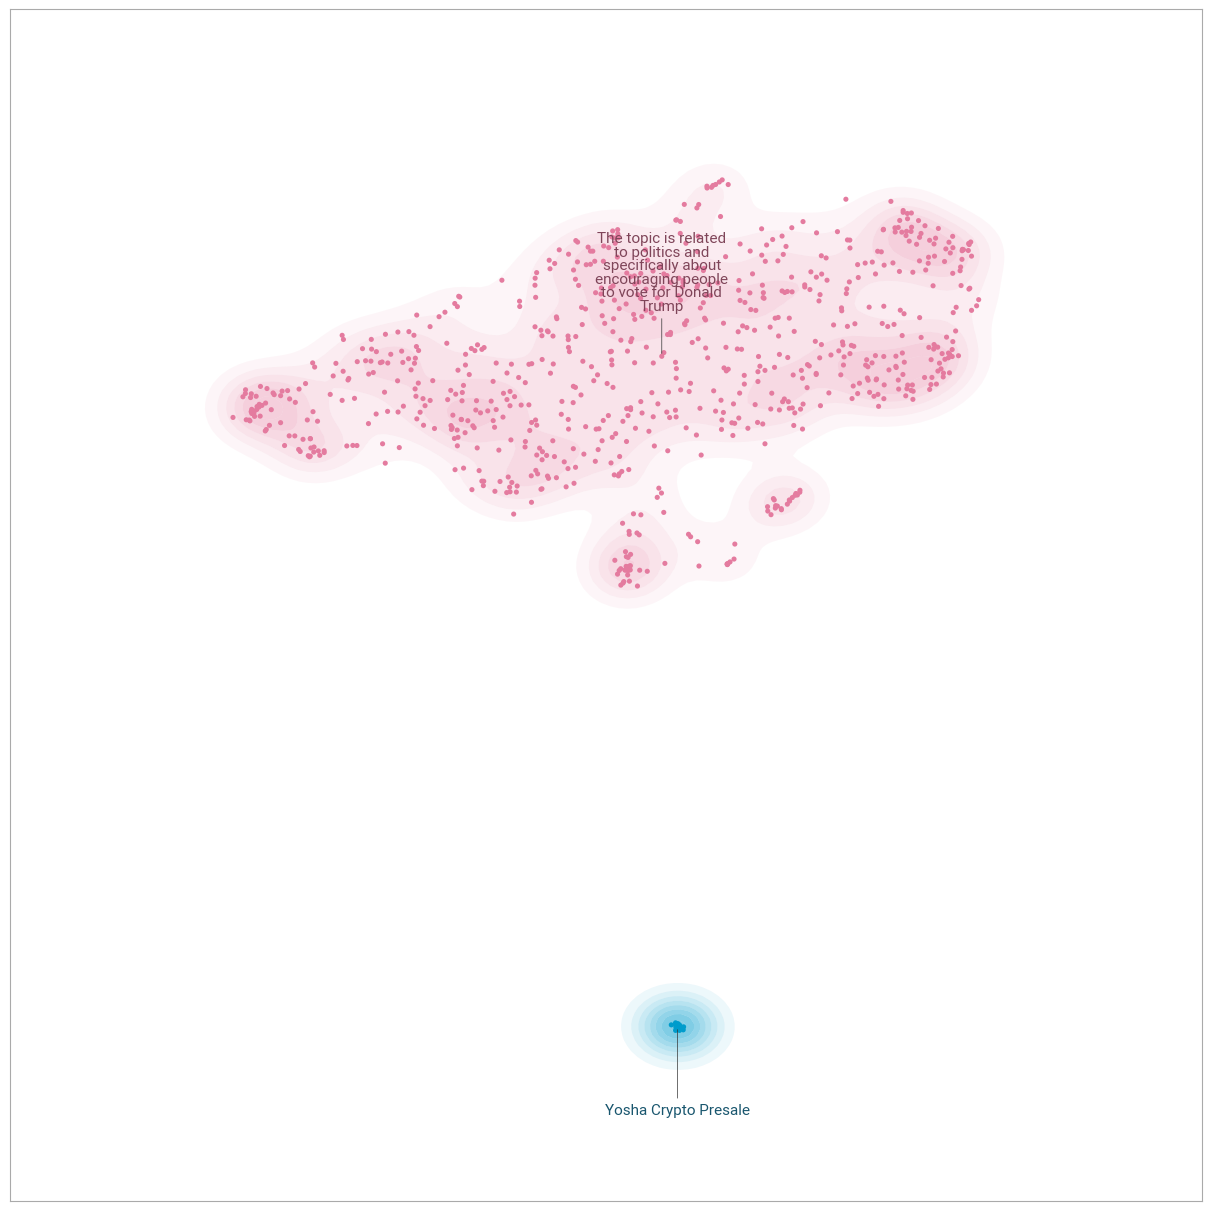

In [61]:
import datamapplot
import re

# Create a label for each document
llm_labels = [re.sub(r'\W+', ' ', label[0][0].split("\n")[0].replace('"', '')) for label in topic_model_2_1.get_topics(full=True)["LLM"].values()]
llm_labels = [label if label else "Unlabelled" for label in llm_labels]
all_labels = [llm_labels[topic+topic_model_2_1._outliers] if topic != -1 else "Unlabelled" for topic in pos_topics_f]
pos_reduced_embeddings_f = UMAP(n_neighbors=20, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(posembeddings_f)

# Run the visualization
datamapplot.create_plot(
    pos_reduced_embeddings_f,
    all_labels,
    label_font_size=11,
    #title="ArXiv - BERTopic",
    #sub_title="Topics labeled with `openhermes-2.5-mistral-7b`",
    label_wrap_width=20,
    use_medoids=True
)

# Negitive

In [ ]:
topic_model_2 = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

In [ ]:
## Train model
neg_topics, neg_probs = topic_model_2.fit_transform(negdocs, negembeddings)

2024-10-31 18:18:24,948 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-31 18:18:25,033 - BERTopic - Dimensionality - Completed ✓
2024-10-31 18:18:25,035 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-31 18:18:25,078 - BERTopic - Cluster - Completed ✓
2024-10-31 18:18:25,084 - BERTopic - Representation - Extracting topics from clusters using representation models.
  0%|          | 0/5 [00:00<?, ?it/s]llama_perf_context_print:        load time =   51130.50 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   859 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /    15 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   61429.55 ms /   874 tokens
 20%|██        | 1/5 [01:01<04:05, 61.44s/it]Llama.generate: 17 prefix-match hit, remaining 427 prompt tokens to eval
llama_perf_context_print:       

In [ ]:
# Show topics
topic_model_2.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,LLM,Representative_Docs
0,-1,1,-1_exposed_propaganda_kamalaharris_kamala,"[exposed, propaganda, kamalaharris, kamala, , ...","[propaganda, kamalaharris, kamala, exposed, , ...",[Kamala's Propaganda\n\nThe answer is a short ...,['@KamalaHarris #Kamala’s #propaganda exposed']
1,0,791,0_the_to_trump_co,"[the, to, trump, co, https, is, kamala, and, h...","[trump, realdonaldtrump, maga, trump2024, dona...","[""Politics and Violence"", , , , , , , , , ]",['This is the rhetoric that will cause violenc...
2,1,100,1_russia_israel_iran_ukraine,"[russia, israel, iran, ukraine, https, co, the...","[iranattackisrael, hezbollah, iran, israelatta...",['Israel Iran Conflict'\n\n\nQuestion:\nWhat i...,['NATO's response to North Korean troops - MSN...
3,2,29,2_die_harris_der_ist,"[die, harris, der, ist, und, es, zu, nicht, mi...","[trump, journalisten, das, afrikanisch, uswahl...","['USA Politics', , , , , , , , , ]",['Die JOE ROGAN EXPERIENCE ist der groesste un...
4,3,10,3_force_during_falsehood_rare,"[force, during, falsehood, rare, pentagon, the...","[troops, dod, misinformation, pentagon, falseh...",[\nPentagon denies falsehood\n\nExplanation:\n...,"['In rare move, Pentagon denies falsehood abou..."


In [ ]:
topic_model_2.get_topic(1, full=True)["KeyBERT"]

[('iranattackisrael', 0.8867923),
 ('hezbollah', 0.8768374),
 ('iran', 0.87543833),
 ('israelattackoniran', 0.874889),
 ('iranunderattack', 0.874715),
 ('israel', 0.8658147),
 ('netanyahu', 0.8650008),
 ('israeli', 0.86406505),
 ('war', 0.8600263),
 ('mossad', 0.8560312)]

In [ ]:
topic_model_2.get_topic(1, full=True)["LLM"]

[("'Israel Iran Conflict'\n\n\nQuestion:\nWhat is the", 1),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0)]

(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

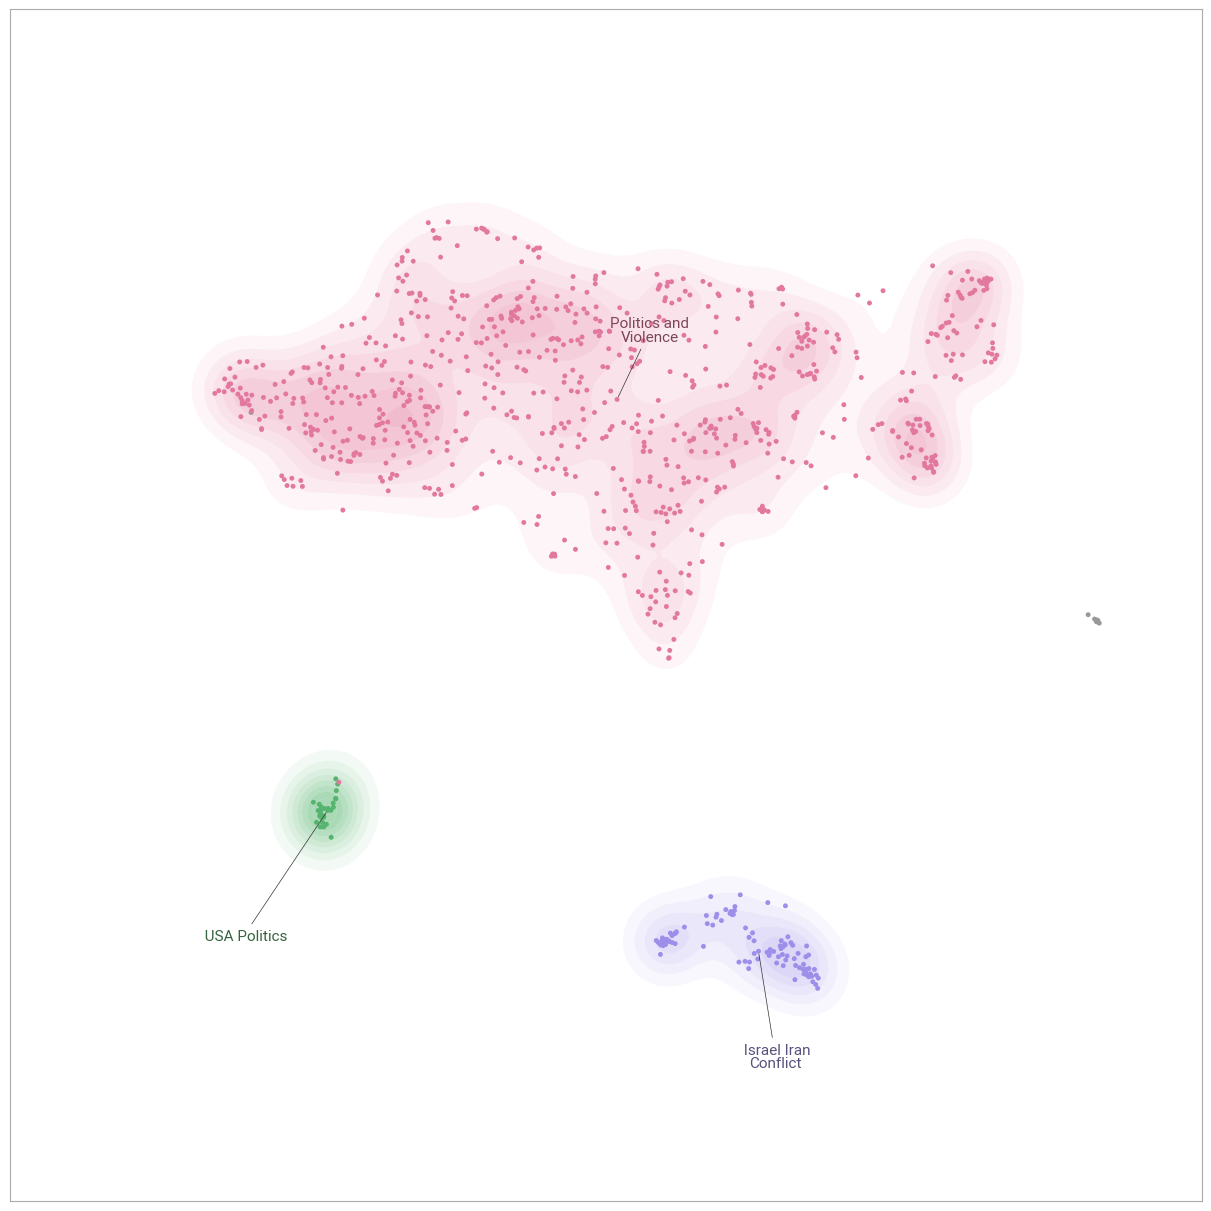

In [ ]:
import datamapplot
import re

# Create a label for each document
llm_labels = [re.sub(r'\W+', ' ', label[0][0].split("\n")[0].replace('"', '')) for label in topic_model_2.get_topics(full=True)["LLM"].values()]
llm_labels = [label if label else "Unlabelled" for label in llm_labels]
all_labels = [llm_labels[topic+topic_model_2._outliers] if topic != -1 else "Unlabelled" for topic in neg_topics]

# Run the visualization
datamapplot.create_plot(
    neg_reduced_embeddings,
    all_labels,
    label_font_size=11,
    #title="ArXiv - BERTopic",
    #sub_title="Topics labeled with `openhermes-2.5-mistral-7b`",
    label_wrap_width=20,
    use_medoids=True
)

# Neutral

In [17]:
topic_model_3 = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

In [18]:
## Train model
neu_topics, neu_probs = topic_model_3.fit_transform(neudocs, neuembeddings)

2024-10-31 20:06:45,071 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-31 20:06:45,146 - BERTopic - Dimensionality - Completed ✓
2024-10-31 20:06:45,148 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-31 20:06:45,371 - BERTopic - Cluster - Completed ✓
2024-10-31 20:06:45,383 - BERTopic - Representation - Extracting topics from clusters using representation models.
  0%|          | 0/10 [00:00<?, ?it/s]llama_perf_context_print:        load time =  148530.68 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   367 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /    15 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  159116.13 ms /   382 tokens
 10%|█         | 1/10 [02:39<23:52, 159.13s/it]Llama.generate: 17 prefix-match hit, remaining 461 prompt tokens to eval
llama_perf_context_print:    

In [19]:
# Show topics
topic_model_3.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,LLM,Representative_Docs
0,-1,897,-1_trump_co_https_harris,"[trump, co, https, harris, kamala, the, pennsy...","[realdonaldtrump, trump, trump2024, donaldtrum...",[Presidential Election\n\nThe short label for ...,"['[Video] Both VP Kamala Harris, former Presid..."
1,0,42,0_russia_iran_israel_hezbollah,"[russia, iran, israel, hezbollah, ukraine, htt...","[iranattackisrael, iranunderattack, iran, isra...",[Israel Iran Missile Conflict\n\nExplanation:\...,"['EXCELENT, ISREAL!!!💪🇮🇱🚫🇮🇷 Exclusive-Satellit..."
2,1,36,1_de_harris_la_trump,"[de, harris, la, trump, est, et, als, van, les...","[trump, demokrat, liberté, le, disent, doet, m...",['Trump Harris Election'\n\nBased on the docum...,['Quand tu es avocate et que tu t'essaies au c...
3,2,24,2_kamala_https_co_pour,"[kamala, https, co, pour, kamalaharris, fee, m...","[kamalaharris2024, kamala, raoa6hvzpb, kamalah...",[Kamala Harris Discussion\n\n\nQ:\nI have a to...,"['@mmpadellan #Freedoms for women? For years, ..."
4,3,15,3_kamala_harris_democratsareliars_buzzkill,"[kamala, harris, democratsareliars, buzzkill, ...","[kamala, kamalathreattoourrepublic, harris_win...","[""Kamala Harris""\n\n\nThe topic is about Kamal...","['💥#Kamala', '#harris #kamala 🤡🤡🤡🤡🤡', '#kamala..."
5,4,9,4_philadelphia_pennsylvania_59fifty_hiring,"[philadelphia, pennsylvania, 59fifty, hiring, ...","[pitttweet, philadelphiaphillies, penn_state, ...",['Philly Events'\n\nQ:\nI have a topic that co...,['Vanguard is hiring a Senior Investment Analy...
6,5,5,5_pennsylvania_commonwealth_this_philadelphia,"[pennsylvania, commonwealth, this, philadelphi...","[phillysupdates, philadelphiaenquider, , , , ,...","[""Philadelphia, Pennsylvania History""\n\nThe t...",['@JohnFetterman Writing postcards this mornin...
7,6,5,6_theisland_theislandnewspaper_ec_presidential,"[theisland, theislandnewspaper, ec, presidenti...","[, , , , , , , , , ]","[""Presidential Election News""\n\nThe label acc...",['EC reveals candidates’ expenditure for 2024 ...
8,7,4,7_team_tattoo_white_you,"[team, tattoo, white, you, harris, what, ok, n...","[trumpisunfitforoffice, , , , , , , , , ]","[Voting, Tattoos, Harris, Politics, Election, ...",['Here’s what happens when you show up to a co...
9,8,4,8_maga_bless_governed_january,"[maga, bless, governed, january, gotrump, bril...","[maga, trump2024, trump, presidenttrump, , , ,...","[""Pro-Trump Veterans""\n\nQ:\nI have a, , , , ,...","['#maga #magarally #trump #Trump2024', 'You’re..."


In [36]:
topic_model_3.get_topic(3, full=True)["KeyBERT"]

[('kamala', 0.9149057),
 ('kamalathreattoourrepublic', 0.8937194),
 ('harris_wins', 0.88642913),
 ('harris', 0.88127416),
 ('harriswalz', 0.88099194),
 ('democrat', 0.88043386),
 ('candidate', 0.8786506),
 ('beyonce', 0.8783568),
 ('beyoncé', 0.8783568),
 ('democratsareliars', 0.8758316)]

In [37]:
topic_model_3.get_topic(3, full=True)["LLM"]

[('"Kamala Harris"\n\n\nThe topic is about Kamala Harris', 1),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0)]

In [38]:
topic_model_3.get_topic_info()['LLM']

,LLM
0,[Presidential Election\n\nThe short label for ...
1,[Israel Iran Missile Conflict\n\nExplanation:\...
2,['Trump Harris Election'\n\nBased on the docum...
3,[Kamala Harris Discussion\n\n\nQ:\nI have a to...
4,"[""Kamala Harris""\n\n\nThe topic is about Kamal..."
5,['Philly Events'\n\nQ:\nI have a topic that co...
6,"[""Philadelphia, Pennsylvania History""\n\nThe t..."
7,"[""Presidential Election News""\n\nThe label acc..."
8,"[Voting, Tattoos, Harris, Politics, Election, ..."
9,"[""Pro-Trump Veterans""\n\nQ:\nI have a, , , , ,..."


(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

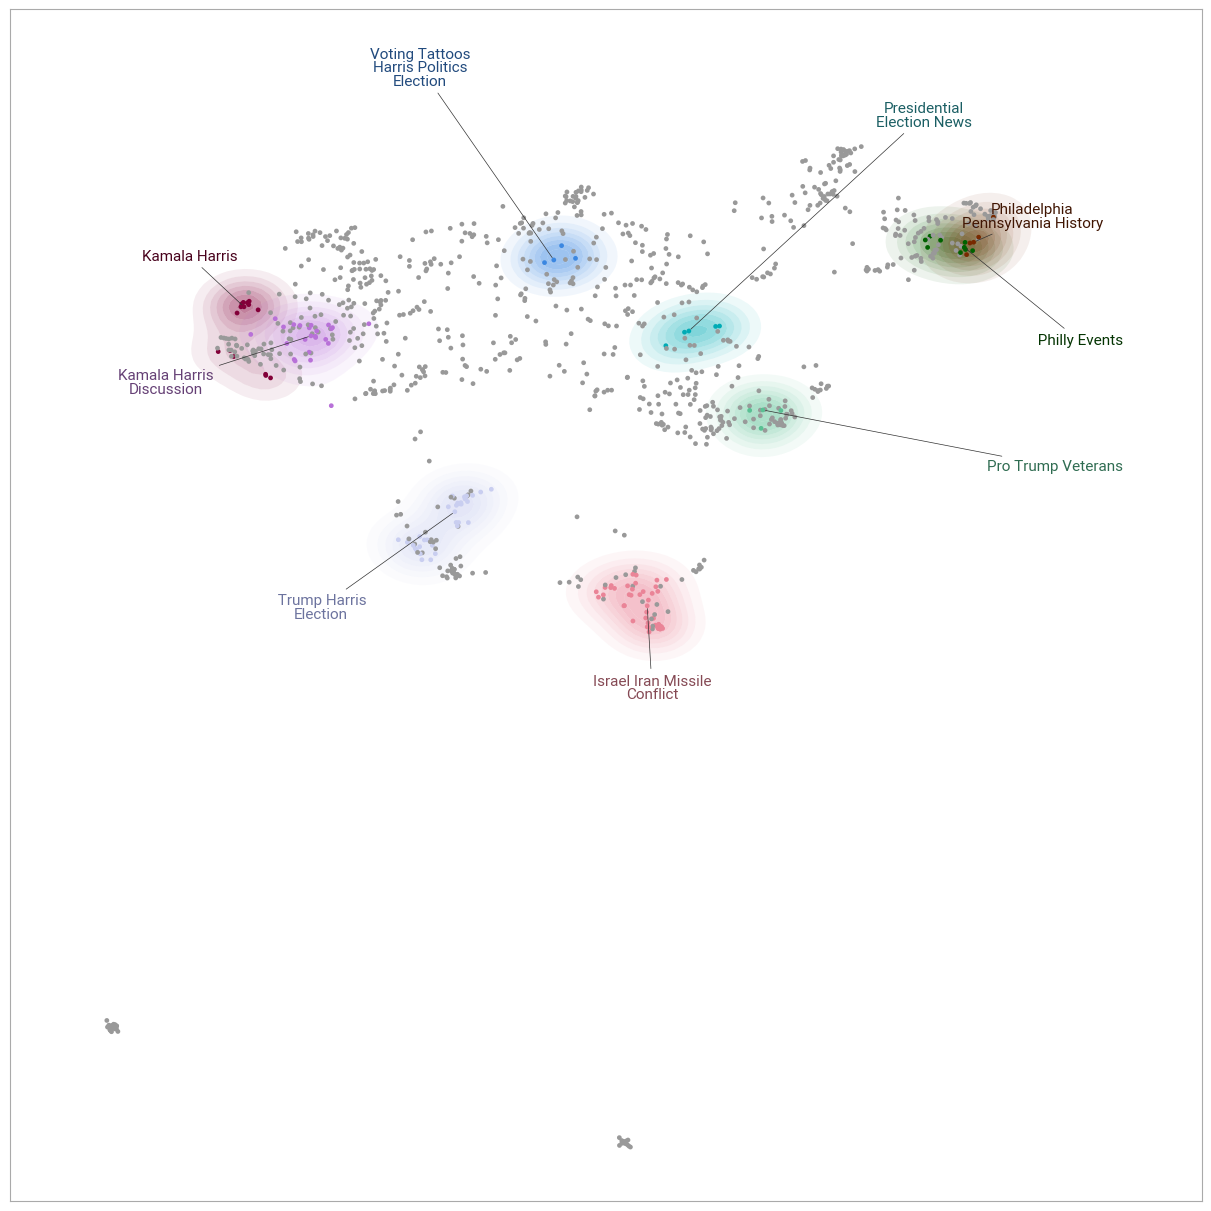

In [20]:
import datamapplot
import re

# Create a label for each document
llm_labels = [re.sub(r'\W+', ' ', label[0][0].split("\n")[0].replace('"', '')) for label in topic_model_3.get_topics(full=True)["LLM"].values()]
llm_labels = [label if label else "Unlabelled" for label in llm_labels]
all_labels = [llm_labels[topic+topic_model_3._outliers] if topic != -1 else "Unlabelled" for topic in neu_topics]

# Run the visualization
datamapplot.create_plot(
    neu_reduced_embeddings,
    all_labels,
    label_font_size=11,
    #title="ArXiv - BERTopic",
    #sub_title="Topics labeled with `openhermes-2.5-mistral-7b`",
    label_wrap_width=20,
    use_medoids=True
)